# The Sparks Foundation : Data Science and Business Analytics Intern

### Author - Prajwal KP

### Task - 2 : Prediction using Unsupervised ML 

From the given ‘Iris’ flower dataset, predict the optimum number of clusters and represent it visually.

Algorithm used : K-means clustering



The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by the British statistician, eugenicist, and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis. It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species. Two of the three species were collected in the Gaspé Peninsula "all from the same pasture, and picked on the same day and measured at the same time by the same person with the same apparatus".Fisher's paper was published in the journal, the Annals of Eugenics, creating controversy about the continued use of the Iris dataset for teaching statistical techniques today.

The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. Based on the combination of these four features, Fisher developed a linear discriminant model to distinguish the species from each other.


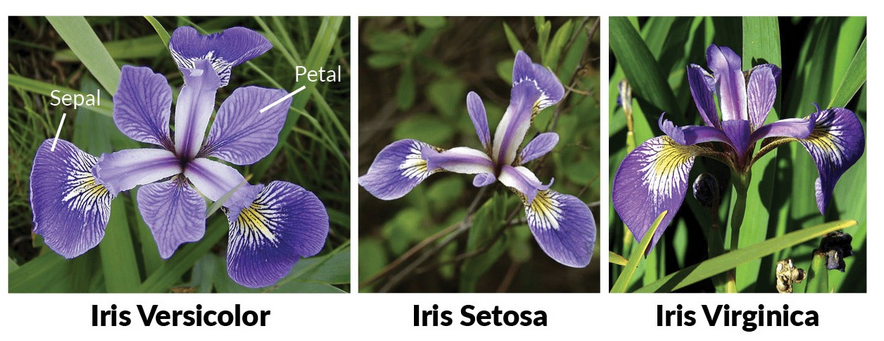


### We are clustering Iris Dataset using K-Means

Attribute Information:

 * sepal length in cm
 * sepal width in cm
 * petal length in cm
 * petal width in cm
 * class: -- Iris-setosa -- Iris-versicolour -- Iris-virginica

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

#### Reading the dataset

In [2]:
iris = pd.read_csv('iris.csv')
x = iris.iloc[:,[0,1,2,3]].values

In [3]:
iris.info()
iris.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
iris_outcome = pd.crosstab(index = iris["Species"], columns = 'count')
iris_outcome

col_0,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [5]:
iris_setosa = iris.loc[iris['Species']=='Iris-setosa']
iris_virginica = iris.loc[iris['Species']=='Iris-virginica']
iris_versicolor = iris.loc[iris['Species']=='Iris-versicolor']

#### Distribution plot for each specie

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

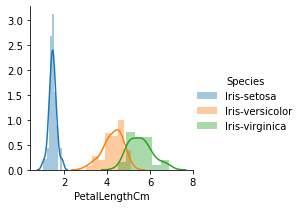

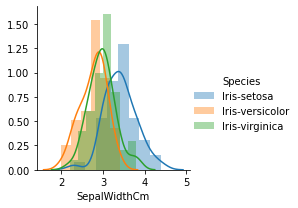

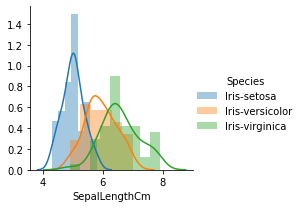

In [6]:
sns.FacetGrid(iris,hue="Species",height=3).map(sns.distplot,"PetalLengthCm").add_legend()
sns.FacetGrid(iris,hue="Species",height=3).map(sns.distplot,"SepalWidthCm").add_legend()
sns.FacetGrid(iris,hue="Species",height=3).map(sns.distplot,"SepalLengthCm").add_legend()

D:\Anaconda\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


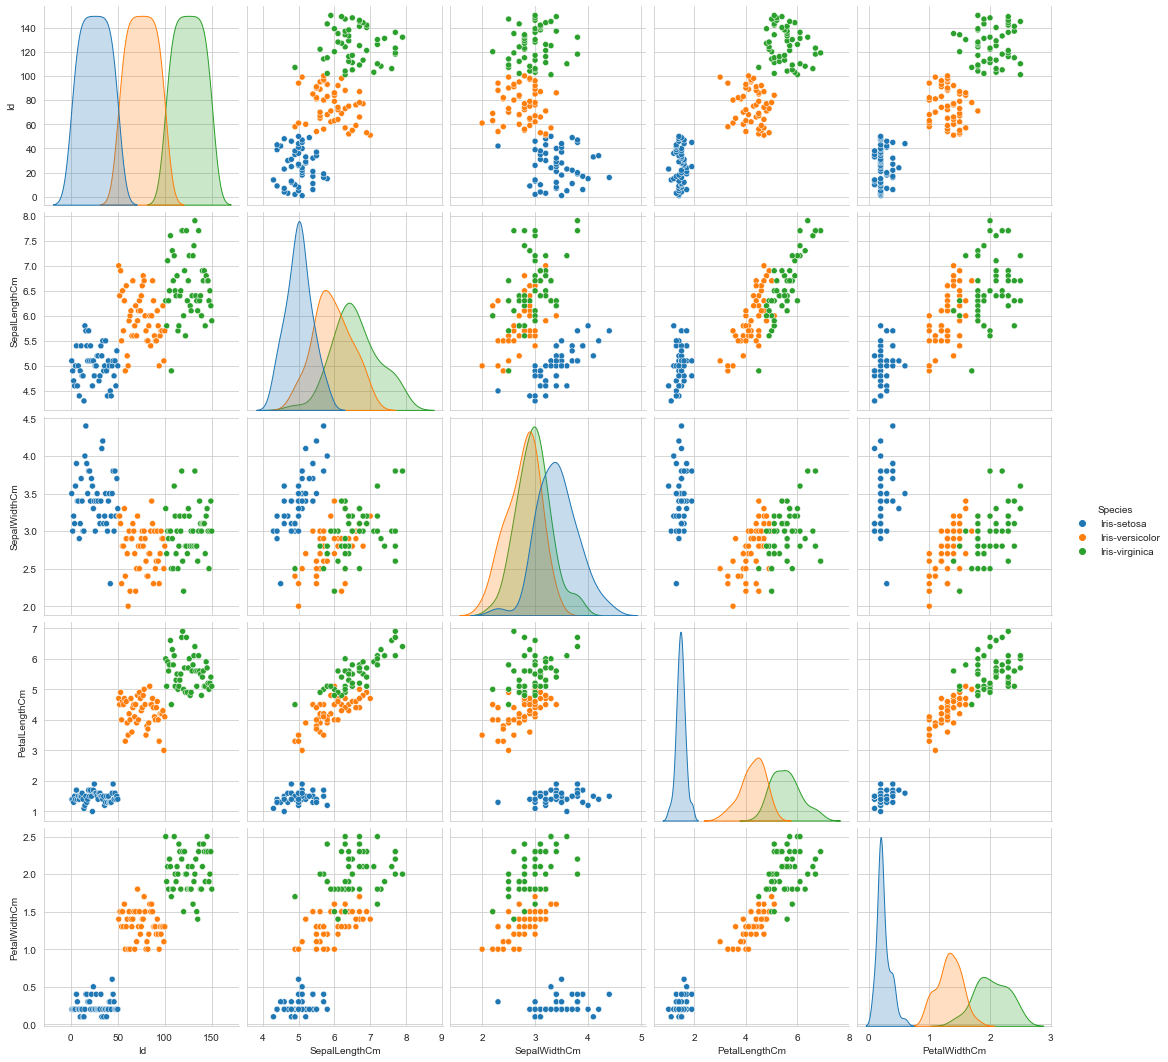

In [7]:
sns.set_style("whitegrid")
sns.pairplot(iris, hue='Species', size = 3)
plt.show()

## K - Means
K-Means is a centroid based algorithm ,or a distance-based algorithm where we calculate the distance to assign a point to a cluster. In K-means, each cluster is associated with a centroid.

In [8]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init = "k-means++", max_iter = 300, n_init =10, random_state =0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

### Let us use the elbow method to find out 'k' clusters

Text(0, 0.5, 'WCSS')

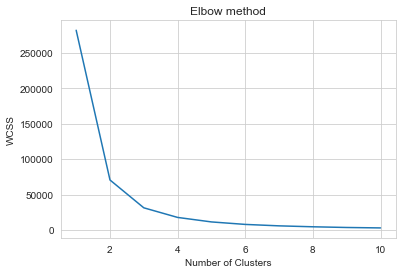

In [9]:
plt.plot(range(1,11), wcss)
plt.title('Elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

### Implementing K-Means Clustering
There is a sharp decrease in WCSS from 2 to 3, and a sudden decrease in WCSS implies an increased performance of the clusters.

In [10]:
kmeans = KMeans(n_clusters =3, init = 'k-means++', max_iter = 300, n_init = 10, random_state =0)
y_kmeans = kmeans.fit_predict(x)

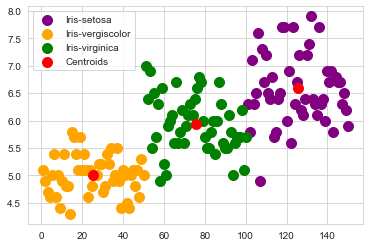

In [11]:
#visualising the clusters
plt.scatter(x[y_kmeans == 0,0], x[y_kmeans == 0,1], s=100, c = 'purple', label = 'Iris-setosa' )
plt.scatter(x[y_kmeans == 1,0], x[y_kmeans == 1,1], s=100, c = 'orange', label = 'Iris-vergiscolor' )
plt.scatter(x[y_kmeans == 2,0], x[y_kmeans == 2,1], s=100, c = 'green', label = 'Iris-virginica' )
#plotting the centroids of the clusters

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')
plt.legend()